In [1]:
import json
import pandas as pd
from src.main.imu_data_io import load_raw_sensor_data, save_data
from src.main.imu_preprocessing import sync, resample, remove_gravity, combine_sensor_data
from src.main.imu_preprocessing import moving_average_filter, align_old_msft_watch
from src.utils.imu_data_visualization import plot_raw_sensor

In [2]:
with open('../config/imu_config.json') as config_file:
    config = json.load(config_file)
upsample_frequency = config['resampling']['upsample_frequency']

In [3]:
def process_data(data, steps, plot_each_step=False):
    for i, step in enumerate(steps):
        data = step(*data)
        if plot_each_step:
            plot_raw_sensor(data, title=f'Step {i+1}: {step.__name__}')
    return data

In [4]:
steps = [
    lambda acc, gyro: sync(acc, gyro),
    lambda acc, gyro: resample(acc, gyro, 100),
    lambda acc, gyro: (remove_gravity(acc, upsample_frequency), gyro),
    lambda acc, gyro: moving_average_filter(acc, gyro),
    lambda acc, gyro: align_old_msft_watch(acc, gyro)
]

In [5]:
acc_data, gyro_data = load_raw_sensor_data('../data/raw/19')

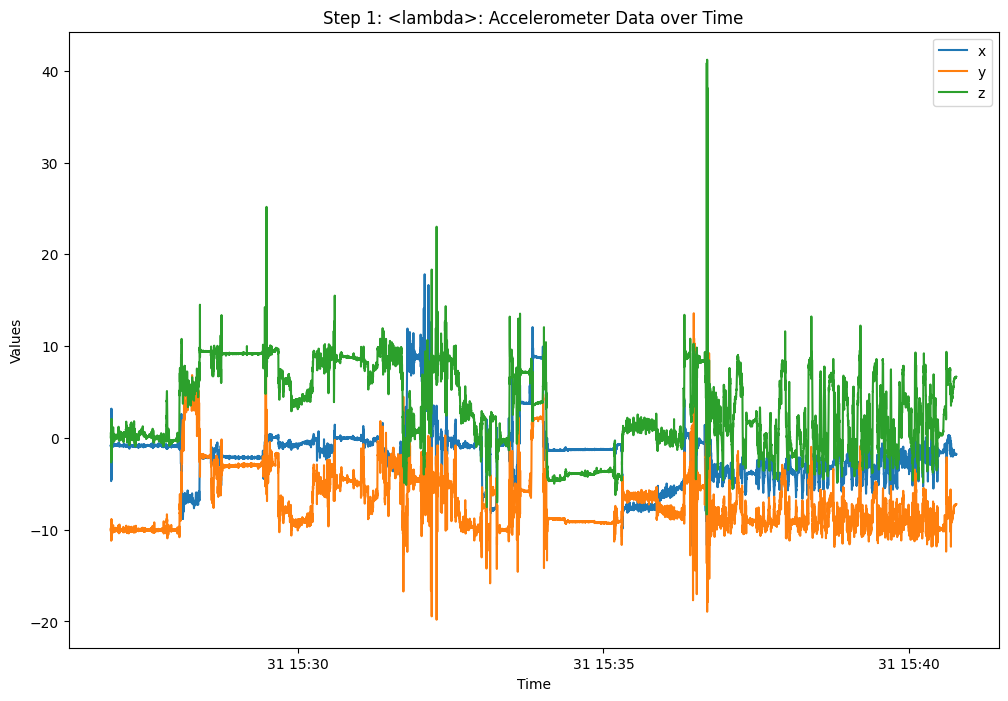

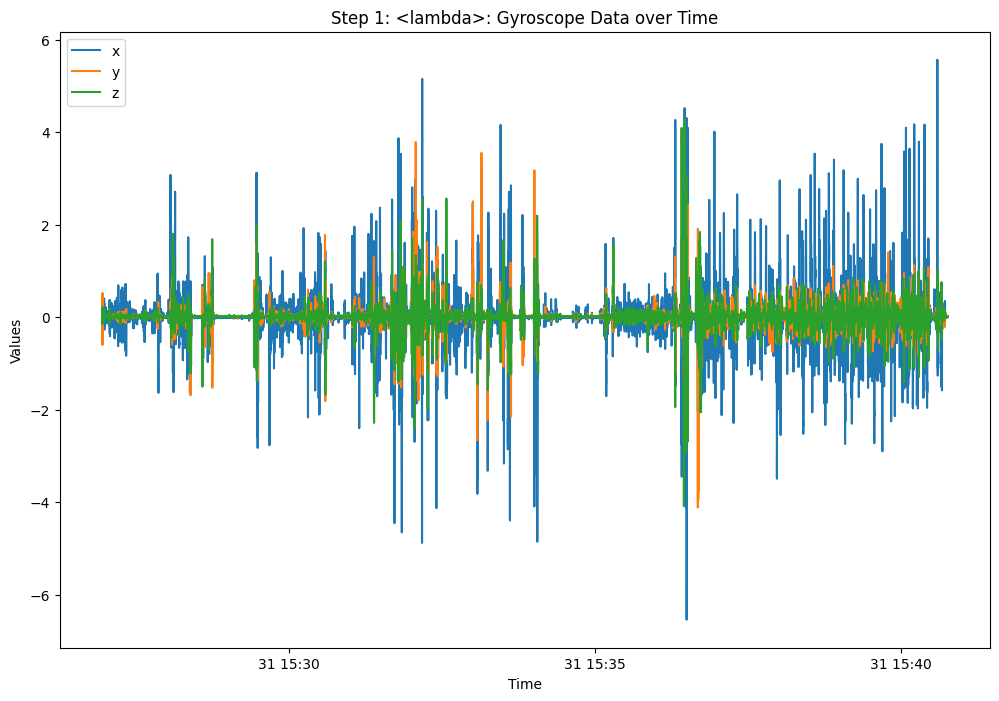

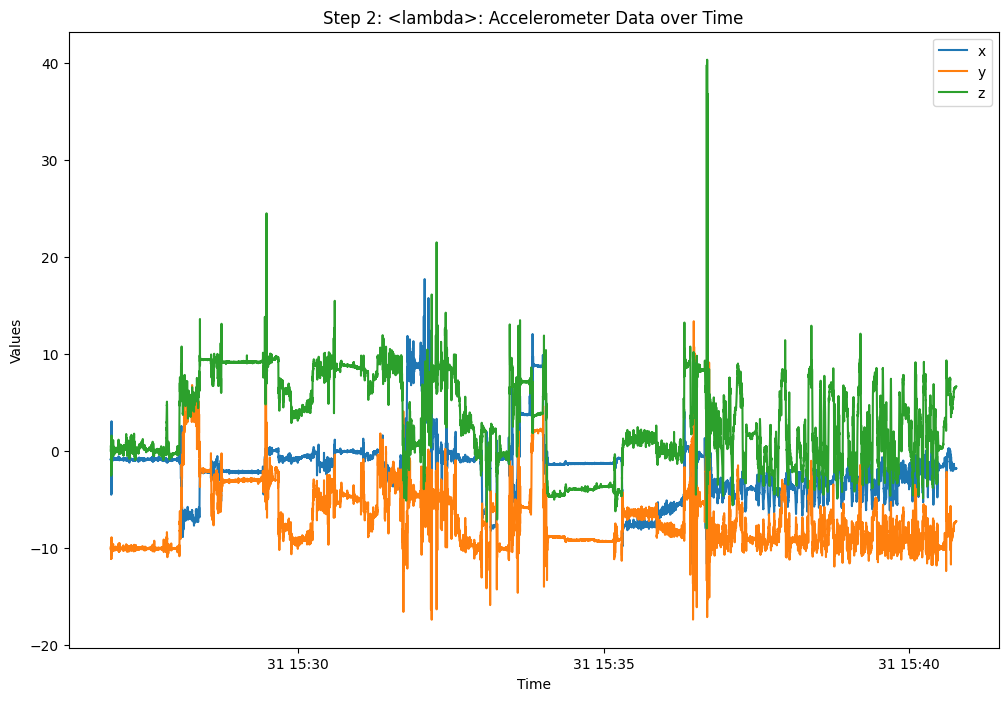

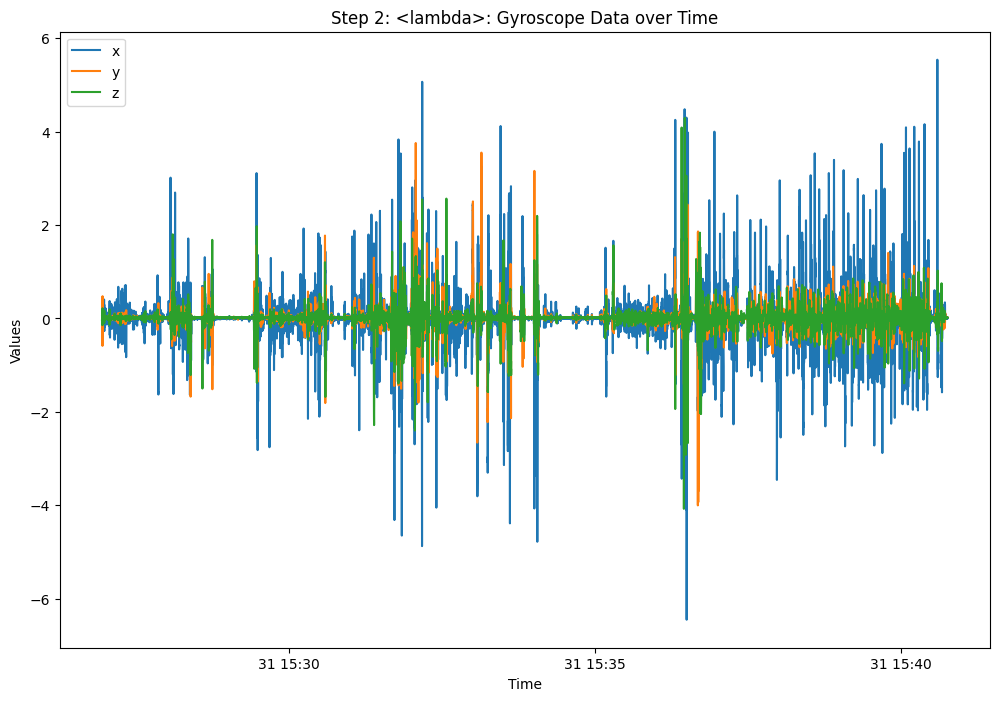

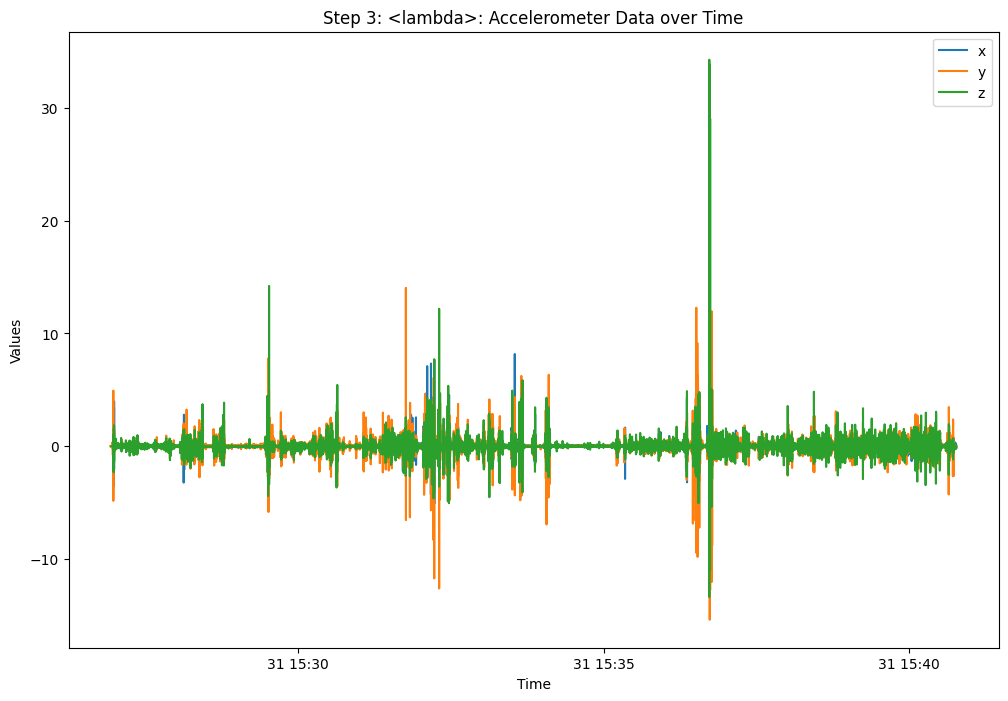

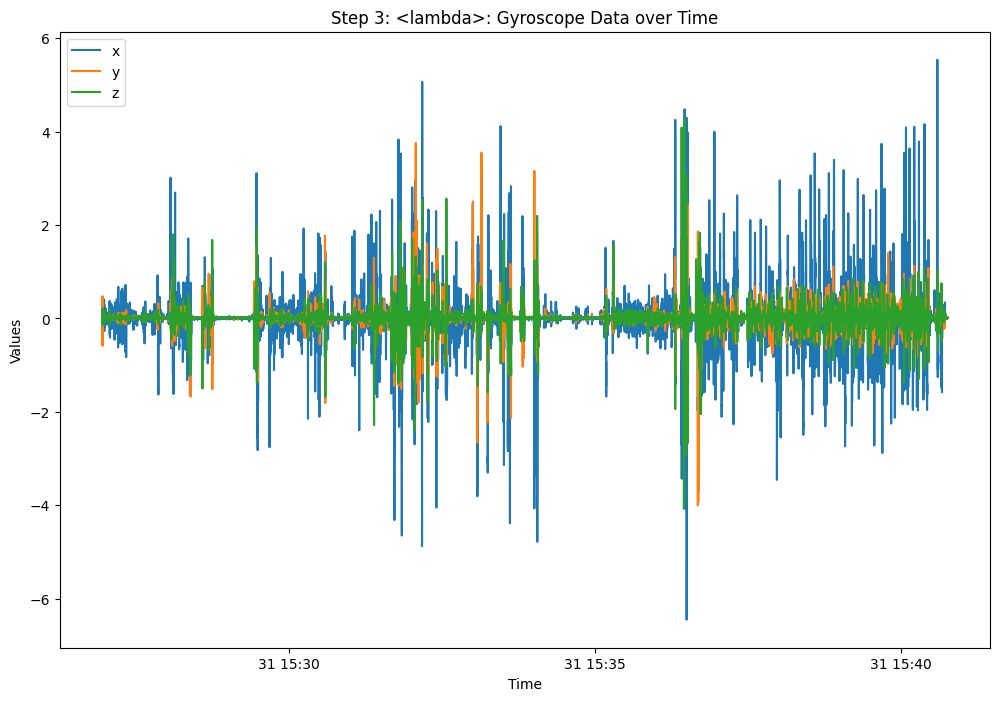

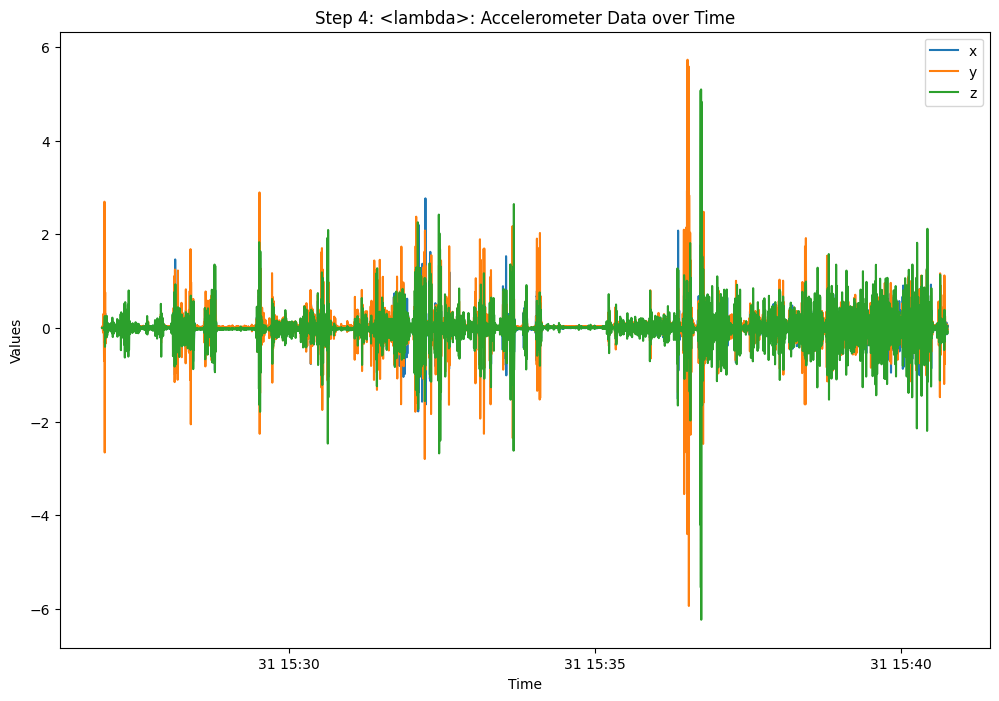

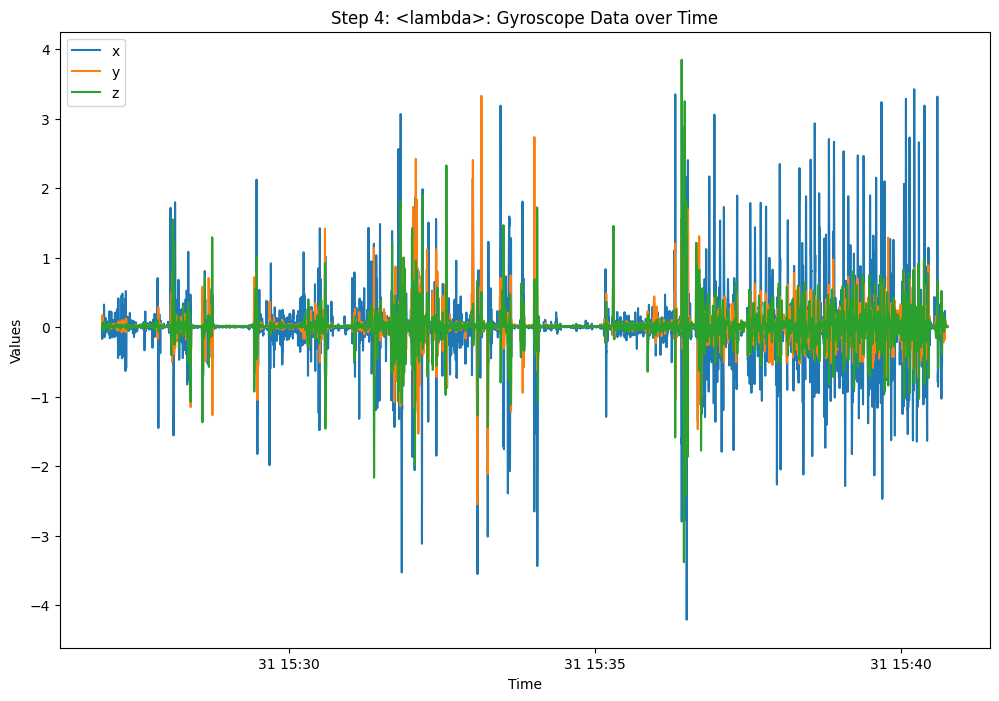

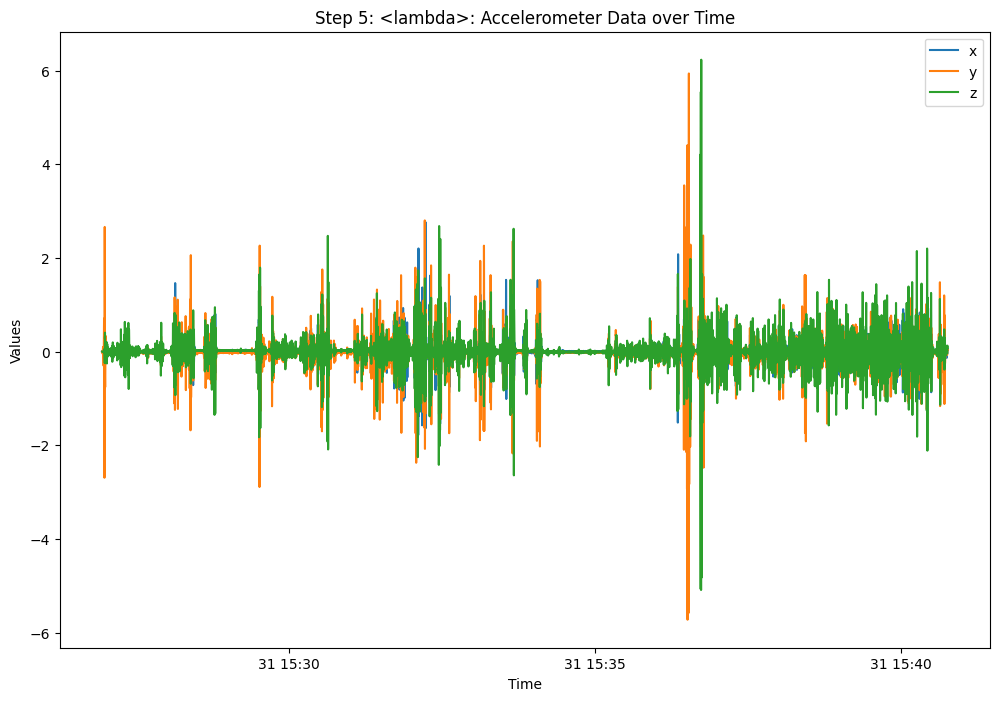

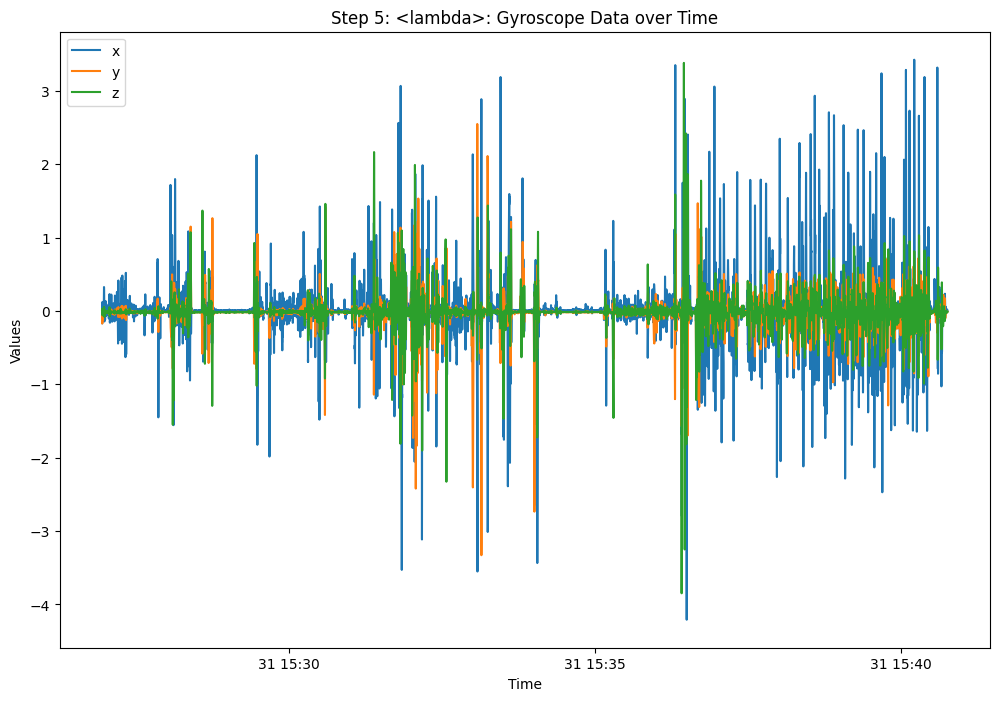

In [6]:
acc_processed, gyro_processed = process_data((acc_data, gyro_data), steps, True)

In [7]:
R = combine_sensor_data(acc_processed, gyro_processed)

In [8]:
save_data(R, '..', 'R19', 'pickle')